In [1]:
import gillespy2 as gp2
import stochss_compute as sssc

In [2]:
import sys
sys.path.insert(1, '../test/unit_tests/')
import gillespy2_models as models

In [3]:
decay = models.create_decay()
dimer = models.create_dimerization()

In [4]:
import multiprocessing as mp

In [5]:
from distributed import Client

In [6]:
dask = Client()

2023-02-09 18:26:38,957 - distributed.http.proxy - INFO - To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
2023-02-09 18:26:38,980 - distributed.scheduler - INFO - State start
2023-02-09 18:26:38,984 - distributed.scheduler - INFO -   Scheduler at:     tcp://127.0.0.1:38435
2023-02-09 18:26:38,984 - distributed.scheduler - INFO -   dashboard at:            127.0.0.1:8787
2023-02-09 18:26:38,999 - distributed.nanny - INFO -         Start Nanny at: 'tcp://127.0.0.1:44383'
2023-02-09 18:26:39,002 - distributed.nanny - INFO -         Start Nanny at: 'tcp://127.0.0.1:35687'
2023-02-09 18:26:39,005 - distributed.nanny - INFO -         Start Nanny at: 'tcp://127.0.0.1:37415'
2023-02-09 18:26:39,009 - distributed.nanny - INFO -         Start Nanny at: 'tcp://127.0.0.1:38563'
2023-02-09 18:26:39,324 - distributed.scheduler - INFO - Register worker <WorkerState 'tcp://127.0.0.1:36375', name: 1, status: init, memory: 0, pro

In [7]:
port = dask.scheduler.addr.split(':')[2]
port

'38435'

In [8]:
import asyncio

In [9]:
async def _sssc():
    kwargs = {
        'dask_scheduler_port': port
    }
    await sssc.start_api(**kwargs)

In [10]:
process = mp.Process(target=asyncio.run, args=(_sssc(),))

In [11]:
process.start()

/home/mdip/.python/cpython/Lib/multiprocessing/process.py:125: RuntimeWarning: coroutine '_sssc' was never awaited
  del self._target, self._args, self._kwargs


In [12]:
sim = sssc.RemoteSimulation(decay, host='localhost')

StochSS-Compute listening on: :29681
Cache directory: /home/mdip/projects/StochSS-Compute/examples/cache
Connecting to Dask scheduler at: localhost:38435

2023-02-09 18:26:39.991917 | <127.0.0.1> | Simulation Run Request | <613f39621a1f713f11869e914ead2c20> | Results not cached. Running simulation.
2023-02-09 18:26:40.125963 | <127.0.0.1> | Simulation Run Request | <613f39621a1f713f11869e914ead2c20> | Results not cached. Running simulation.
2023-02-09 18:26:40.167080 | <127.0.0.1> | Simulation Run Request | <613f39621a1f713f11869e914ead2c20> | Results not cached. Running simulation.
2023-02-09 18:26:40.188021 | <127.0.0.1> | Simulation Run Request | <613f39621a1f713f11869e914ead2c20> | Results not cached. Running simulation.
2023-02-09 18:26:40.207924 | <127.0.0.1> | Simulation Run Request | <613f39621a1f713f11869e914ead2c20> | Results not cached. Running simulation.
2023-02-09 18:26:40.229195 | <127.0.0.1> | Simulation Run Request | <613f39621a1f713f11869e914ead2c20> | Results not cac

In [13]:
import time

In [14]:
def run_parallel(n_trajectories):
    _results = []
    for i in range(1,n_trajectories+1):
        time.sleep(.005)
        _results.append(sim.run(solver=gp2.NumPySSASolver, force_new=True))
    return _results

In [15]:
results = run_parallel(100)

2023-02-09 18:26:39,999 - distributed.scheduler - INFO - Receive client connection: Client-34731213-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:40,000 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:57662
2023-02-09 18:26:40,154 - distributed.scheduler - INFO - Receive client connection: Client-34876e2e-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:40,155 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:57670
2023-02-09 18:26:40,173 - distributed.scheduler - INFO - Receive client connection: Client-348dc9cc-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:40,174 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:57676


[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run
[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run
[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run


2023-02-09 18:26:40,194 - distributed.scheduler - INFO - Receive client connection: Client-3490edcb-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:40,195 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:57686
2023-02-09 18:26:40,214 - distributed.scheduler - INFO - Receive client connection: Client-34940a56-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:40,216 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:57702
2023-02-09 18:26:40,237 - distributed.scheduler - INFO - Receive client connection: Client-34974375-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:40,238 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:57714
2023-02-09 18:26:40,244 - distributed.scheduler - INFO - Remove client Client-34731213-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:40,245 - distributed.core - INFO - Received 'close-stream' from tcp://127.0.0.1:57662; closing.
2023-02-09 18:26:40,245 - distributed.scheduler - INFO - Remo

[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run
[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run
[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run
[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run


2023-02-09 18:26:40,955 - distributed.scheduler - INFO - Receive client connection: Client-35054f07-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:40,957 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:57760
2023-02-09 18:26:41,058 - distributed.scheduler - INFO - Remove client Client-35054f07-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:41,058 - distributed.core - INFO - Received 'close-stream' from tcp://127.0.0.1:57760; closing.
2023-02-09 18:26:41,059 - distributed.scheduler - INFO - Remove client Client-35054f07-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:41,060 - distributed.scheduler - INFO - Close client connection: Client-35054f07-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:41,174 - distributed.scheduler - INFO - Receive client connection: Client-35241ec3-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:41,175 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:57780


[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run


2023-02-09 18:26:41,225 - distributed.scheduler - INFO - Remove client Client-35241ec3-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:41,226 - distributed.core - INFO - Received 'close-stream' from tcp://127.0.0.1:57780; closing.
2023-02-09 18:26:41,226 - distributed.scheduler - INFO - Remove client Client-35241ec3-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:41,227 - distributed.scheduler - INFO - Close client connection: Client-35241ec3-a8d1-11ed-90b5-bffce49803b2


[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run


2023-02-09 18:26:41,925 - distributed.scheduler - INFO - Receive client connection: Client-35994bc5-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:41,926 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:57808
2023-02-09 18:26:41,943 - distributed.scheduler - INFO - Receive client connection: Client-359bdd64-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:41,944 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:57838
2023-02-09 18:26:41,950 - distributed.scheduler - INFO - Remove client Client-35994bc5-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:41,950 - distributed.core - INFO - Received 'close-stream' from tcp://127.0.0.1:57808; closing.
2023-02-09 18:26:41,951 - distributed.scheduler - INFO - Remove client Client-35994bc5-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:41,952 - distributed.scheduler - INFO - Close client connection: Client-35994bc5-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:41,995 - distributed.scheduler - INFO - 

[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run
[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run


2023-02-09 18:26:42,309 - distributed.scheduler - INFO - Receive client connection: Client-35c0406f-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:42,310 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:57856
2023-02-09 18:26:42,402 - distributed.scheduler - INFO - Remove client Client-35c0406f-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:42,403 - distributed.core - INFO - Received 'close-stream' from tcp://127.0.0.1:57856; closing.
2023-02-09 18:26:42,403 - distributed.scheduler - INFO - Remove client Client-35c0406f-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:42,405 - distributed.scheduler - INFO - Close client connection: Client-35c0406f-a8d1-11ed-90b5-bffce49803b2


[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run


2023-02-09 18:26:42,597 - distributed.scheduler - INFO - Receive client connection: Client-35ffd3f2-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:42,598 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:57872
2023-02-09 18:26:42,615 - distributed.scheduler - INFO - Receive client connection: Client-36026945-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:42,616 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:57890
2023-02-09 18:26:42,622 - distributed.scheduler - INFO - Remove client Client-35ffd3f2-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:42,622 - distributed.core - INFO - Received 'close-stream' from tcp://127.0.0.1:57872; closing.
2023-02-09 18:26:42,623 - distributed.scheduler - INFO - Remove client Client-35ffd3f2-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:42,624 - distributed.scheduler - INFO - Close client connection: Client-35ffd3f2-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:42,670 - distributed.scheduler - INFO - 

[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run
[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run


2023-02-09 18:26:43,019 - distributed.scheduler - INFO - Receive client connection: Client-3640192b-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:43,020 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:57908
2023-02-09 18:26:43,048 - distributed.scheduler - INFO - Remove client Client-3640192b-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:43,049 - distributed.core - INFO - Received 'close-stream' from tcp://127.0.0.1:57908; closing.
2023-02-09 18:26:43,051 - distributed.scheduler - INFO - Remove client Client-3640192b-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:43,054 - distributed.scheduler - INFO - Close client connection: Client-3640192b-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:43,077 - distributed.scheduler - INFO - Receive client connection: Client-36444351-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:43,079 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:57920
2023-02-09 18:26:43,176 - distributed.scheduler - INFO - 

[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run
[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run


2023-02-09 18:26:43,297 - distributed.scheduler - INFO - Receive client connection: Client-366a82aa-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:43,298 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:57940
2023-02-09 18:26:43,359 - distributed.scheduler - INFO - Remove client Client-366a82aa-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:43,360 - distributed.core - INFO - Received 'close-stream' from tcp://127.0.0.1:57940; closing.
2023-02-09 18:26:43,361 - distributed.scheduler - INFO - Remove client Client-366a82aa-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:43,361 - distributed.scheduler - INFO - Close client connection: Client-366a82aa-a8d1-11ed-90b5-bffce49803b2


2023-02-09 18:26:43,492 - asyncio - ERROR - Future exception was never retrieved
future: <Future finished exception=TimeoutError('Timeout')>
TimeoutError: Timeout


[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run


2023-02-09 18:26:43,558 - distributed.scheduler - INFO - Receive client connection: Client-366d4a77-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:43,559 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:57958
2023-02-09 18:26:43,578 - distributed.scheduler - INFO - Receive client connection: Client-36952ac6-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:43,579 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:57974
2023-02-09 18:26:43,581 - distributed.scheduler - INFO - Remove client Client-366d4a77-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:43,582 - distributed.core - INFO - Received 'close-stream' from tcp://127.0.0.1:57958; closing.
2023-02-09 18:26:43,583 - distributed.scheduler - INFO - Remove client Client-366d4a77-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:43,584 - distributed.scheduler - INFO - Close client connection: Client-366d4a77-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:43,614 - distributed.scheduler - INFO - 

2023-02-09 18:26:43.570895 | <127.0.0.1> | Simulation Run Request | <613f39621a1f713f11869e914ead2c20> | Results not cached. Running simulation.
2023-02-09 18:26:43.584053 | Cache | <cache/613f39621a1f713f11869e914ead2c20.results> | Add
2023-02-09 18:26:43.497548 | Cache | <cache/613f39621a1f713f11869e914ead2c20.results> | Add
2023-02-09 18:26:43.698557 | Cache | <cache/613f39621a1f713f11869e914ead2c20.results> | Add
2023-02-09 18:26:43.613752 | <127.0.0.1> | Simulation Run Request | <613f39621a1f713f11869e914ead2c20> | Results not cached. Running simulation.
2023-02-09 18:26:44.285811 | <127.0.0.1> | Simulation Run Request | <613f39621a1f713f11869e914ead2c20> | Results not cached. Running simulation.
2023-02-09 18:26:44.299892 | Cache | <cache/613f39621a1f713f11869e914ead2c20.results> | Add
2023-02-09 18:26:44.350739 | <127.0.0.1> | Simulation Run Request | <613f39621a1f713f11869e914ead2c20> | Results not cached. Running simulation.
2023-02-09 18:26:44.390593 | Cache | <cache/613f3962

[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run
[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run


2023-02-09 18:26:44,273 - distributed.scheduler - INFO - Receive client connection: Client-36ff763f-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:44,274 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:58004
2023-02-09 18:26:44,293 - distributed.scheduler - INFO - Receive client connection: Client-37024cd8-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:44,294 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:58026
2023-02-09 18:26:44,297 - distributed.scheduler - INFO - Remove client Client-36ff763f-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:44,298 - distributed.core - INFO - Received 'close-stream' from tcp://127.0.0.1:58004; closing.
2023-02-09 18:26:44,299 - distributed.scheduler - INFO - Remove client Client-36ff763f-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:44,300 - distributed.scheduler - INFO - Close client connection: Client-36ff763f-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:44,344 - distributed.scheduler - INFO - 

[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run
[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run


2023-02-09 18:26:44,542 - distributed.scheduler - INFO - Receive client connection: Client-3728977d-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:44,543 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:58036
2023-02-09 18:26:44,614 - distributed.scheduler - INFO - Remove client Client-3728977d-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:44,615 - distributed.core - INFO - Received 'close-stream' from tcp://127.0.0.1:58036; closing.
2023-02-09 18:26:44,615 - distributed.scheduler - INFO - Remove client Client-3728977d-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:44,616 - distributed.scheduler - INFO - Close client connection: Client-3728977d-a8d1-11ed-90b5-bffce49803b2


[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run


2023-02-09 18:26:44,777 - distributed.scheduler - INFO - Receive client connection: Client-374c60e7-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:44,778 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:58058
2023-02-09 18:26:44,846 - distributed.scheduler - INFO - Remove client Client-374c60e7-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:44,847 - distributed.core - INFO - Received 'close-stream' from tcp://127.0.0.1:58058; closing.
2023-02-09 18:26:44,848 - distributed.scheduler - INFO - Remove client Client-374c60e7-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:44,850 - distributed.scheduler - INFO - Close client connection: Client-374c60e7-a8d1-11ed-90b5-bffce49803b2


[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run


2023-02-09 18:26:45,248 - distributed.scheduler - INFO - Receive client connection: Client-3793f94d-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:45,249 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:46632
2023-02-09 18:26:45,275 - distributed.scheduler - INFO - Remove client Client-3793f94d-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:45,277 - distributed.core - INFO - Received 'close-stream' from tcp://127.0.0.1:46632; closing.
2023-02-09 18:26:45,278 - distributed.scheduler - INFO - Remove client Client-3793f94d-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:45,280 - distributed.scheduler - INFO - Receive client connection: Client-3797e52d-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:45,282 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:46664
2023-02-09 18:26:45,284 - distributed.scheduler - INFO - Close client connection: Client-3793f94d-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:45,408 - distributed.scheduler - INFO - 

[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run
[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run


2023-02-09 18:26:45,720 - distributed.scheduler - INFO - Receive client connection: Client-37dc4e5b-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:45,721 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:46678
2023-02-09 18:26:45,738 - distributed.scheduler - INFO - Receive client connection: Client-37df050b-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:45,739 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:46696
2023-02-09 18:26:45,745 - distributed.scheduler - INFO - Remove client Client-37dc4e5b-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:45,745 - distributed.core - INFO - Received 'close-stream' from tcp://127.0.0.1:46678; closing.
2023-02-09 18:26:45,746 - distributed.scheduler - INFO - Remove client Client-37dc4e5b-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:45,747 - distributed.scheduler - INFO - Close client connection: Client-37dc4e5b-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:45,804 - distributed.scheduler - INFO - 

[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run
[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run


2023-02-09 18:26:45,973 - distributed.scheduler - INFO - Receive client connection: Client-3802ec5e-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:45,973 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:46704
2023-02-09 18:26:46,038 - distributed.scheduler - INFO - Remove client Client-3802ec5e-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:46,039 - distributed.core - INFO - Received 'close-stream' from tcp://127.0.0.1:46704; closing.
2023-02-09 18:26:46,039 - distributed.scheduler - INFO - Remove client Client-3802ec5e-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:46,040 - distributed.scheduler - INFO - Close client connection: Client-3802ec5e-a8d1-11ed-90b5-bffce49803b2


[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run


2023-02-09 18:26:46,396 - distributed.scheduler - INFO - Receive client connection: Client-384361a7-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:46,397 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:46726
2023-02-09 18:26:46,415 - distributed.scheduler - INFO - Receive client connection: Client-384640c2-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:46,416 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:46732
2023-02-09 18:26:46,421 - distributed.scheduler - INFO - Remove client Client-384361a7-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:46,422 - distributed.core - INFO - Received 'close-stream' from tcp://127.0.0.1:46726; closing.
2023-02-09 18:26:46,423 - distributed.scheduler - INFO - Remove client Client-384361a7-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:46,424 - distributed.scheduler - INFO - Close client connection: Client-384361a7-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:46,504 - distributed.scheduler - INFO - 

2023-02-09 18:26:46,504 - asyncio - ERROR - Future exception was never retrieved
future: <Future finished exception=TimeoutError('Timeout')>
TimeoutError: Timeout
2023-02-09 18:26:46,506 - asyncio - ERROR - Future exception was never retrieved
future: <Future finished exception=TimeoutError('Timeout')>
TimeoutError: Timeout


[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run
[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run


2023-02-09 18:26:46.423667 | Cache | <cache/613f39621a1f713f11869e914ead2c20.results> | Add
2023-02-09 18:26:46.453567 | <127.0.0.1> | Simulation Run Request | <613f39621a1f713f11869e914ead2c20> | Results not cached. Running simulation.
2023-02-09 18:26:46.736495 | <127.0.0.1> | Simulation Run Request | <613f39621a1f713f11869e914ead2c20> | Results not cached. Running simulation.
2023-02-09 18:26:46.750454 | Cache | <cache/613f39621a1f713f11869e914ead2c20.results> | Add
2023-02-09 18:26:46.861687 | <127.0.0.1> | Simulation Run Request | <613f39621a1f713f11869e914ead2c20> | Results not cached. Running simulation.
2023-02-09 18:26:46.608290 | Cache | <cache/613f39621a1f713f11869e914ead2c20.results> | Add
2023-02-09 18:26:46.895755 | Cache | <cache/613f39621a1f713f11869e914ead2c20.results> | Add
2023-02-09 18:26:47.127616 | Cache | <cache/613f39621a1f713f11869e914ead2c20.results> | Add
2023-02-09 18:26:47.000709 | <127.0.0.1> | Simulation Run Request | <613f39621a1f713f11869e914ead2c20> | 

2023-02-09 18:26:46,723 - distributed.scheduler - INFO - Receive client connection: Client-38757055-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:46,724 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:46744
2023-02-09 18:26:46,742 - distributed.scheduler - INFO - Receive client connection: Client-38782544-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:46,743 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:46776
2023-02-09 18:26:46,748 - distributed.scheduler - INFO - Remove client Client-38757055-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:46,749 - distributed.core - INFO - Received 'close-stream' from tcp://127.0.0.1:46744; closing.
2023-02-09 18:26:46,749 - distributed.scheduler - INFO - Remove client Client-38757055-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:46,750 - distributed.scheduler - INFO - Close client connection: Client-38757055-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:46,862 - distributed.scheduler - INFO - 

[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run
[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run


2023-02-09 18:26:46,977 - distributed.scheduler - INFO - Receive client connection: Client-389c2d39-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:46,978 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:46796
2023-02-09 18:26:47,103 - distributed.scheduler - INFO - Remove client Client-389c2d39-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:47,104 - distributed.core - INFO - Received 'close-stream' from tcp://127.0.0.1:46796; closing.
2023-02-09 18:26:47,104 - distributed.scheduler - INFO - Remove client Client-389c2d39-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:47,105 - distributed.scheduler - INFO - Close client connection: Client-389c2d39-a8d1-11ed-90b5-bffce49803b2


[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run


2023-02-09 18:26:47,642 - distributed.scheduler - INFO - Receive client connection: Client-3901a0ad-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:47,643 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:46806
2023-02-09 18:26:47,661 - distributed.scheduler - INFO - Receive client connection: Client-39045576-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:47,662 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:46828
2023-02-09 18:26:47,667 - distributed.scheduler - INFO - Remove client Client-3901a0ad-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:47,668 - distributed.core - INFO - Received 'close-stream' from tcp://127.0.0.1:46806; closing.
2023-02-09 18:26:47,668 - distributed.scheduler - INFO - Remove client Client-3901a0ad-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:47,672 - distributed.scheduler - INFO - Close client connection: Client-3901a0ad-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:47,802 - distributed.scheduler - INFO - 

[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run
[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run


2023-02-09 18:26:47,923 - distributed.scheduler - INFO - Receive client connection: Client-392c8b48-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:47,924 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:46842
2023-02-09 18:26:47,970 - distributed.scheduler - INFO - Remove client Client-392c8b48-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:47,971 - distributed.core - INFO - Received 'close-stream' from tcp://127.0.0.1:46842; closing.
2023-02-09 18:26:47,971 - distributed.scheduler - INFO - Remove client Client-392c8b48-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:47,972 - distributed.scheduler - INFO - Close client connection: Client-392c8b48-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:48,067 - distributed.scheduler - INFO - Receive client connection: Client-392efdde-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:48,068 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:46860


[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run
[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run


2023-02-09 18:26:48,139 - distributed.scheduler - INFO - Remove client Client-392efdde-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:48,139 - distributed.core - INFO - Received 'close-stream' from tcp://127.0.0.1:46860; closing.
2023-02-09 18:26:48,140 - distributed.scheduler - INFO - Remove client Client-392efdde-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:48,141 - distributed.scheduler - INFO - Close client connection: Client-392efdde-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:48,614 - distributed.scheduler - INFO - Receive client connection: Client-3995ca7e-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:48,615 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:46872
2023-02-09 18:26:48,654 - distributed.scheduler - INFO - Remove client Client-3995ca7e-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:48,655 - distributed.core - INFO - Received 'close-stream' from tcp://127.0.0.1:46872; closing.
2023-02-09 18:26:48,658 - distributed.scheduler - INFO - Remove cl

[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run
[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run


2023-02-09 18:26:48,927 - distributed.scheduler - INFO - Receive client connection: Client-39c5aeee-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:48,928 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:46910
2023-02-09 18:26:49,055 - distributed.scheduler - INFO - Remove client Client-39c5aeee-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:49,056 - distributed.core - INFO - Received 'close-stream' from tcp://127.0.0.1:46910; closing.
2023-02-09 18:26:49,057 - distributed.scheduler - INFO - Remove client Client-39c5aeee-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:49,058 - distributed.scheduler - INFO - Close client connection: Client-39c5aeee-a8d1-11ed-90b5-bffce49803b2


[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run


2023-02-09 18:26:49,177 - distributed.scheduler - INFO - Receive client connection: Client-39ebbdf8-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:49,178 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:46926
2023-02-09 18:26:49,217 - distributed.scheduler - INFO - Remove client Client-39ebbdf8-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:49,218 - distributed.core - INFO - Received 'close-stream' from tcp://127.0.0.1:46926; closing.
2023-02-09 18:26:49,218 - distributed.scheduler - INFO - Remove client Client-39ebbdf8-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:49,219 - distributed.scheduler - INFO - Close client connection: Client-39ebbdf8-a8d1-11ed-90b5-bffce49803b2


2023-02-09 18:26:49,315 - asyncio - ERROR - Future exception was never retrieved
future: <Future finished exception=TimeoutError('Timeout')>
TimeoutError: Timeout
2023-02-09 18:26:49,332 - asyncio - ERROR - Future exception was never retrieved
future: <Future finished exception=TimeoutError('Timeout')>
TimeoutError: Timeout


2023-02-09 18:26:49.116384 | Cache | <cache/613f39621a1f713f11869e914ead2c20.results> | Add
2023-02-09 18:26:49.360460 | Cache | <cache/613f39621a1f713f11869e914ead2c20.results> | Add
2023-02-09 18:26:49.371462 | <127.0.0.1> | Simulation Run Request | <613f39621a1f713f11869e914ead2c20> | Results not cached. Running simulation.
2023-02-09 18:26:49.735729 | <127.0.0.1> | Simulation Run Request | <613f39621a1f713f11869e914ead2c20> | Results not cached. Running simulation.
2023-02-09 18:26:49.747947 | Cache | <cache/613f39621a1f713f11869e914ead2c20.results> | Add
2023-02-09 18:26:49.899019 | <127.0.0.1> | Simulation Run Request | <613f39621a1f713f11869e914ead2c20> | Results not cached. Running simulation.
2023-02-09 18:26:50.033081 | <127.0.0.1> | Simulation Run Request | <613f39621a1f713f11869e914ead2c20> | Results not cached. Running simulation.
2023-02-09 18:26:49.924569 | Cache | <cache/613f39621a1f713f11869e914ead2c20.results> | Add
2023-02-09 18:26:50.093043 | <127.0.0.1> | Simulatio

[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run


2023-02-09 18:26:49,719 - distributed.scheduler - INFO - Receive client connection: Client-3a3e681a-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:49,720 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:46944
2023-02-09 18:26:49,744 - distributed.scheduler - INFO - Remove client Client-3a3e681a-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:49,745 - distributed.core - INFO - Received 'close-stream' from tcp://127.0.0.1:46944; closing.
2023-02-09 18:26:49,746 - distributed.scheduler - INFO - Remove client Client-3a3e681a-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:49,749 - distributed.scheduler - INFO - Close client connection: Client-3a3e681a-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:49,754 - distributed.scheduler - INFO - Receive client connection: Client-3a41f5b6-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:49,756 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:46958
2023-02-09 18:26:49,899 - distributed.scheduler - INFO - 

[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run
[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run


2023-02-09 18:26:50,021 - distributed.scheduler - INFO - Receive client connection: Client-3a6c84b3-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:50,022 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:46976
2023-02-09 18:26:50,038 - distributed.scheduler - INFO - Receive client connection: Client-3a6f2b0f-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:50,038 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:46986
2023-02-09 18:26:50,074 - distributed.scheduler - INFO - Remove client Client-3a6c84b3-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:50,075 - distributed.core - INFO - Received 'close-stream' from tcp://127.0.0.1:46976; closing.
2023-02-09 18:26:50,076 - distributed.scheduler - INFO - Remove client Client-3a6c84b3-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:50,077 - distributed.scheduler - INFO - Close client connection: Client-3a6c84b3-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:50,092 - distributed.scheduler - INFO - 

[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run
[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run


2023-02-09 18:26:50,296 - distributed.scheduler - INFO - Receive client connection: Client-3a9688ae-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:50,297 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:47008
2023-02-09 18:26:50,314 - distributed.scheduler - INFO - Receive client connection: Client-3a9946f0-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:50,315 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:47026
2023-02-09 18:26:50,321 - distributed.scheduler - INFO - Remove client Client-3a9688ae-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:50,322 - distributed.core - INFO - Received 'close-stream' from tcp://127.0.0.1:47008; closing.
2023-02-09 18:26:50,324 - distributed.scheduler - INFO - Remove client Client-3a9688ae-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:50,325 - distributed.scheduler - INFO - Close client connection: Client-3a9688ae-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:50,391 - distributed.scheduler - INFO - 

[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run
[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run


2023-02-09 18:26:50,589 - distributed.scheduler - INFO - Receive client connection: Client-3ac33a49-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:50,590 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:47040
2023-02-09 18:26:50,747 - distributed.scheduler - INFO - Remove client Client-3ac33a49-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:50,748 - distributed.core - INFO - Received 'close-stream' from tcp://127.0.0.1:47040; closing.
2023-02-09 18:26:50,748 - distributed.scheduler - INFO - Remove client Client-3ac33a49-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:50,749 - distributed.scheduler - INFO - Close client connection: Client-3ac33a49-a8d1-11ed-90b5-bffce49803b2


[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run


2023-02-09 18:26:51,573 - distributed.scheduler - INFO - Receive client connection: Client-3b597629-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:51,574 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:47066
2023-02-09 18:26:51,594 - distributed.scheduler - INFO - Receive client connection: Client-3b5c4e91-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:51,595 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:47084
2023-02-09 18:26:51,600 - distributed.scheduler - INFO - Remove client Client-3b597629-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:51,601 - distributed.core - INFO - Received 'close-stream' from tcp://127.0.0.1:47066; closing.
2023-02-09 18:26:51,602 - distributed.scheduler - INFO - Remove client Client-3b597629-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:51,603 - distributed.scheduler - INFO - Close client connection: Client-3b597629-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:51,687 - distributed.scheduler - INFO - 

2023-02-09 18:26:51,685 - asyncio - ERROR - Future exception was never retrieved
future: <Future finished exception=TimeoutError('Timeout')>
TimeoutError: Timeout
2023-02-09 18:26:51,686 - asyncio - ERROR - Future exception was never retrieved
future: <Future finished exception=TimeoutError('Timeout')>
TimeoutError: Timeout


[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run
[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run


2023-02-09 18:26:51.602919 | Cache | <cache/613f39621a1f713f11869e914ead2c20.results> | Add
2023-02-09 18:26:51.685403 | <127.0.0.1> | Simulation Run Request | <613f39621a1f713f11869e914ead2c20> | Results not cached. Running simulation.
2023-02-09 18:26:51.758701 | Cache | <cache/613f39621a1f713f11869e914ead2c20.results> | Add
2023-02-09 18:26:51.941249 | <127.0.0.1> | Simulation Run Request | <613f39621a1f713f11869e914ead2c20> | Results not cached. Running simulation.
2023-02-09 18:26:52.064730 | Cache | <cache/613f39621a1f713f11869e914ead2c20.results> | Add
2023-02-09 18:26:52.330565 | <127.0.0.1> | Simulation Run Request | <613f39621a1f713f11869e914ead2c20> | Results not cached. Running simulation.
2023-02-09 18:26:52.486743 | <127.0.0.1> | Simulation Run Request | <613f39621a1f713f11869e914ead2c20> | Results not cached. Running simulation.
2023-02-09 18:26:52.365547 | Cache | <cache/613f39621a1f713f11869e914ead2c20.results> | Add
2023-02-09 18:26:52.768459 | Cache | <cache/613f3962

2023-02-09 18:26:51,924 - distributed.scheduler - INFO - Receive client connection: Client-3b8ee4c0-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:51,925 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:47112
2023-02-09 18:26:51,978 - distributed.scheduler - INFO - Remove client Client-3b8ee4c0-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:51,979 - distributed.core - INFO - Received 'close-stream' from tcp://127.0.0.1:47112; closing.
2023-02-09 18:26:51,980 - distributed.scheduler - INFO - Remove client Client-3b8ee4c0-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:51,981 - distributed.scheduler - INFO - Close client connection: Client-3b8ee4c0-a8d1-11ed-90b5-bffce49803b2


[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run


2023-02-09 18:26:52,180 - distributed.scheduler - INFO - Receive client connection: Client-3bb5e8ab-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:52,181 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:47136
2023-02-09 18:26:52,327 - distributed.scheduler - INFO - Remove client Client-3bb5e8ab-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:52,328 - distributed.core - INFO - Received 'close-stream' from tcp://127.0.0.1:47136; closing.
2023-02-09 18:26:52,329 - distributed.scheduler - INFO - Remove client Client-3bb5e8ab-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:52,331 - distributed.scheduler - INFO - Close client connection: Client-3bb5e8ab-a8d1-11ed-90b5-bffce49803b2


[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run


2023-02-09 18:26:52,459 - distributed.scheduler - INFO - Receive client connection: Client-3be0975f-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:52,460 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:47144
2023-02-09 18:26:52,533 - distributed.scheduler - INFO - Remove client Client-3be0975f-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:52,533 - distributed.core - INFO - Received 'close-stream' from tcp://127.0.0.1:47144; closing.
2023-02-09 18:26:52,534 - distributed.scheduler - INFO - Remove client Client-3be0975f-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:52,535 - distributed.scheduler - INFO - Close client connection: Client-3be0975f-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:52,674 - distributed.scheduler - INFO - Receive client connection: Client-3bed1fec-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:52,675 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:47156


[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run


2023-02-09 18:26:52,745 - distributed.scheduler - INFO - Remove client Client-3bed1fec-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:52,745 - distributed.core - INFO - Received 'close-stream' from tcp://127.0.0.1:47156; closing.
2023-02-09 18:26:52,746 - distributed.scheduler - INFO - Remove client Client-3bed1fec-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:52,747 - distributed.scheduler - INFO - Close client connection: Client-3bed1fec-a8d1-11ed-90b5-bffce49803b2


[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run


2023-02-09 18:26:53,001 - distributed.scheduler - INFO - Receive client connection: Client-3c3355dd-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:53,002 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:47182
2023-02-09 18:26:53,068 - distributed.scheduler - INFO - Remove client Client-3c3355dd-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:53,069 - distributed.core - INFO - Received 'close-stream' from tcp://127.0.0.1:47182; closing.
2023-02-09 18:26:53,070 - distributed.scheduler - INFO - Remove client Client-3c3355dd-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:53,070 - distributed.scheduler - INFO - Close client connection: Client-3c3355dd-a8d1-11ed-90b5-bffce49803b2


[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run


2023-02-09 18:26:53,260 - distributed.scheduler - INFO - Receive client connection: Client-3c5adf6e-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:53,261 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:47192
2023-02-09 18:26:53,360 - distributed.scheduler - INFO - Remove client Client-3c5adf6e-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:53,360 - distributed.core - INFO - Received 'close-stream' from tcp://127.0.0.1:47192; closing.
2023-02-09 18:26:53,361 - distributed.scheduler - INFO - Remove client Client-3c5adf6e-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:53,361 - distributed.scheduler - INFO - Close client connection: Client-3c5adf6e-a8d1-11ed-90b5-bffce49803b2


[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run


2023-02-09 18:26:53,768 - distributed.scheduler - INFO - Receive client connection: Client-3ca843f5-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:53,768 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:47216
2023-02-09 18:26:53,785 - distributed.scheduler - INFO - Receive client connection: Client-3cab052d-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:53,786 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:47244
2023-02-09 18:26:53,793 - distributed.scheduler - INFO - Remove client Client-3ca843f5-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:53,793 - distributed.core - INFO - Received 'close-stream' from tcp://127.0.0.1:47216; closing.
2023-02-09 18:26:53,794 - distributed.scheduler - INFO - Remove client Client-3ca843f5-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:53,803 - distributed.scheduler - INFO - Close client connection: Client-3ca843f5-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:53,853 - distributed.scheduler - INFO - 

[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run
[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run


2023-02-09 18:26:54,368 - distributed.scheduler - INFO - Receive client connection: Client-3d03d86c-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:54,369 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:47256
2023-02-09 18:26:54,386 - distributed.scheduler - INFO - Receive client connection: Client-3d068dd7-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:54,387 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:47270
2023-02-09 18:26:54,393 - distributed.scheduler - INFO - Remove client Client-3d03d86c-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:54,393 - distributed.core - INFO - Received 'close-stream' from tcp://127.0.0.1:47256; closing.
2023-02-09 18:26:54,394 - distributed.scheduler - INFO - Remove client Client-3d03d86c-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:54,395 - distributed.scheduler - INFO - Close client connection: Client-3d03d86c-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:54,463 - distributed.scheduler - INFO - 

[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run
[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run


2023-02-09 18:26:54,662 - distributed.scheduler - INFO - Receive client connection: Client-3d309a45-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:54,663 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:47296
2023-02-09 18:26:54,681 - distributed.scheduler - INFO - Receive client connection: Client-3d3370b8-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:54,683 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:47320
2023-02-09 18:26:54,687 - distributed.scheduler - INFO - Remove client Client-3d309a45-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:54,688 - distributed.core - INFO - Received 'close-stream' from tcp://127.0.0.1:47296; closing.
2023-02-09 18:26:54,689 - distributed.scheduler - INFO - Remove client Client-3d309a45-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:54,690 - distributed.scheduler - INFO - Close client connection: Client-3d309a45-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:54,759 - distributed.scheduler - INFO - 

[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run
[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run


2023-02-09 18:26:55,220 - distributed.scheduler - INFO - Receive client connection: Client-3d85d19b-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:55,221 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:40294
2023-02-09 18:26:55,373 - distributed.scheduler - INFO - Remove client Client-3d85d19b-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:55,374 - distributed.core - INFO - Received 'close-stream' from tcp://127.0.0.1:40294; closing.
2023-02-09 18:26:55,375 - distributed.scheduler - INFO - Remove client Client-3d85d19b-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:55,375 - distributed.scheduler - INFO - Close client connection: Client-3d85d19b-a8d1-11ed-90b5-bffce49803b2


[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run


2023-02-09 18:26:55,849 - distributed.scheduler - INFO - Receive client connection: Client-3de4146b-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:55,853 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:40308
2023-02-09 18:26:55,885 - distributed.scheduler - INFO - Receive client connection: Client-3deaaeb7-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:55,887 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:40322
2023-02-09 18:26:55,892 - distributed.scheduler - INFO - Remove client Client-3de4146b-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:55,893 - distributed.core - INFO - Received 'close-stream' from tcp://127.0.0.1:40308; closing.
2023-02-09 18:26:55,894 - distributed.scheduler - INFO - Remove client Client-3de4146b-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:55,895 - distributed.scheduler - INFO - Close client connection: Client-3de4146b-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:55,942 - distributed.scheduler - INFO - 

[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run
[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run


2023-02-09 18:26:56,151 - distributed.scheduler - INFO - Receive client connection: Client-3e13db06-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:56,152 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:40342
2023-02-09 18:26:56,296 - distributed.scheduler - INFO - Remove client Client-3e13db06-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:56,297 - distributed.core - INFO - Received 'close-stream' from tcp://127.0.0.1:40342; closing.
2023-02-09 18:26:56,297 - distributed.scheduler - INFO - Remove client Client-3e13db06-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:56,298 - distributed.scheduler - INFO - Close client connection: Client-3e13db06-a8d1-11ed-90b5-bffce49803b2


[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run


2023-02-09 18:26:56,638 - asyncio - ERROR - Future exception was never retrieved
future: <Future finished exception=TimeoutError('Timeout')>
TimeoutError: Timeout


2023-02-09 18:26:56.296714 | <127.0.0.1> | Simulation Run Request | <613f39621a1f713f11869e914ead2c20> | Results not cached. Running simulation.
2023-02-09 18:26:56.769964 | <127.0.0.1> | Simulation Run Request | <613f39621a1f713f11869e914ead2c20> | Results not cached. Running simulation.
2023-02-09 18:26:56.784615 | Cache | <cache/613f39621a1f713f11869e914ead2c20.results> | Add
2023-02-09 18:26:56.953243 | Cache | <cache/613f39621a1f713f11869e914ead2c20.results> | Add
2023-02-09 18:26:56.851191 | <127.0.0.1> | Simulation Run Request | <613f39621a1f713f11869e914ead2c20> | Results not cached. Running simulation.
2023-02-09 18:26:57.360947 | <127.0.0.1> | Simulation Run Request | <613f39621a1f713f11869e914ead2c20> | Results not cached. Running simulation.
2023-02-09 18:26:57.386709 | Cache | <cache/613f39621a1f713f11869e914ead2c20.results> | Add
2023-02-09 18:26:57.552416 | Cache | <cache/613f39621a1f713f11869e914ead2c20.results> | Add
2023-02-09 18:26:57.413252 | <127.0.0.1> | Simulatio

2023-02-09 18:26:56,755 - distributed.scheduler - INFO - Receive client connection: Client-3e6f83fc-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:56,756 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:40360
2023-02-09 18:26:56,781 - distributed.scheduler - INFO - Remove client Client-3e6f83fc-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:56,782 - distributed.core - INFO - Received 'close-stream' from tcp://127.0.0.1:40360; closing.
2023-02-09 18:26:56,784 - distributed.scheduler - INFO - Remove client Client-3e6f83fc-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:56,785 - distributed.scheduler - INFO - Receive client connection: Client-3e734f4c-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:56,787 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:40382
2023-02-09 18:26:56,788 - distributed.scheduler - INFO - Close client connection: Client-3e6f83fc-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:56,891 - distributed.scheduler - INFO - 

[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run
[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run


2023-02-09 18:26:57,348 - distributed.scheduler - INFO - Receive client connection: Client-3eca9688-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:57,349 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:40406
2023-02-09 18:26:57,379 - distributed.scheduler - INFO - Receive client connection: Client-3ecdc214-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:57,381 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:40426
2023-02-09 18:26:57,383 - distributed.scheduler - INFO - Remove client Client-3eca9688-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:57,384 - distributed.core - INFO - Received 'close-stream' from tcp://127.0.0.1:40406; closing.
2023-02-09 18:26:57,385 - distributed.scheduler - INFO - Remove client Client-3eca9688-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:57,388 - distributed.scheduler - INFO - Close client connection: Client-3eca9688-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:57,430 - distributed.scheduler - INFO - 

[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run
[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run


2023-02-09 18:26:57,999 - distributed.scheduler - INFO - Receive client connection: Client-3f2ddb7c-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:58,000 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:40448
2023-02-09 18:26:58,018 - distributed.scheduler - INFO - Receive client connection: Client-3f30be2e-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:58,019 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:40468
2023-02-09 18:26:58,024 - distributed.scheduler - INFO - Remove client Client-3f2ddb7c-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:58,024 - distributed.core - INFO - Received 'close-stream' from tcp://127.0.0.1:40448; closing.
2023-02-09 18:26:58,025 - distributed.scheduler - INFO - Remove client Client-3f2ddb7c-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:58,026 - distributed.scheduler - INFO - Close client connection: Client-3f2ddb7c-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:58,062 - distributed.scheduler - INFO - 

[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run
[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run


2023-02-09 18:26:58,351 - distributed.scheduler - INFO - Receive client connection: Client-3f639928-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:58,352 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:40496
2023-02-09 18:26:58,385 - distributed.scheduler - INFO - Remove client Client-3f639928-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:58,386 - distributed.core - INFO - Received 'close-stream' from tcp://127.0.0.1:40496; closing.
2023-02-09 18:26:58,387 - distributed.scheduler - INFO - Remove client Client-3f639928-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:58,387 - distributed.scheduler - INFO - Close client connection: Client-3f639928-a8d1-11ed-90b5-bffce49803b2


[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run


2023-02-09 18:26:58,649 - distributed.scheduler - INFO - Receive client connection: Client-3f9120bc-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:58,650 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:40518
2023-02-09 18:26:58,668 - distributed.scheduler - INFO - Receive client connection: Client-3f93efde-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:58,669 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:40538
2023-02-09 18:26:58,674 - distributed.scheduler - INFO - Remove client Client-3f9120bc-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:58,674 - distributed.core - INFO - Received 'close-stream' from tcp://127.0.0.1:40518; closing.
2023-02-09 18:26:58,674 - distributed.scheduler - INFO - Remove client Client-3f9120bc-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:58,675 - distributed.scheduler - INFO - Close client connection: Client-3f9120bc-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:58,737 - distributed.scheduler - INFO - 

[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run
[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run


2023-02-09 18:26:58,998 - distributed.scheduler - INFO - Receive client connection: Client-3fc6658d-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:58,999 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:40568
2023-02-09 18:26:59,050 - distributed.scheduler - INFO - Remove client Client-3fc6658d-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:59,051 - distributed.core - INFO - Received 'close-stream' from tcp://127.0.0.1:40568; closing.
2023-02-09 18:26:59,052 - distributed.scheduler - INFO - Remove client Client-3fc6658d-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:59,053 - distributed.scheduler - INFO - Close client connection: Client-3fc6658d-a8d1-11ed-90b5-bffce49803b2


[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run


2023-02-09 18:26:59,332 - asyncio - ERROR - Future exception was never retrieved
future: <Future finished exception=TimeoutError('Timeout')>
TimeoutError: Timeout


2023-02-09 18:26:59.108669 | Cache | <cache/613f39621a1f713f11869e914ead2c20.results> | Add
2023-02-09 18:26:59.032998 | <127.0.0.1> | Simulation Run Request | <613f39621a1f713f11869e914ead2c20> | Results not cached. Running simulation.
2023-02-09 18:26:59.630197 | <127.0.0.1> | Simulation Run Request | <613f39621a1f713f11869e914ead2c20> | Results not cached. Running simulation.
2023-02-09 18:26:58.817911 | Cache | <cache/613f39621a1f713f11869e914ead2c20.results> | Add
2023-02-09 18:26:59.766485 | Cache | <cache/613f39621a1f713f11869e914ead2c20.results> | Add
2023-02-09 18:26:59.759358 | Cache | <cache/613f39621a1f713f11869e914ead2c20.results> | Add
2023-02-09 18:26:59.696572 | <127.0.0.1> | Simulation Run Request | <613f39621a1f713f11869e914ead2c20> | Results not cached. Running simulation.
2023-02-09 18:27:00.607131 | <127.0.0.1> | Simulation Run Request | <613f39621a1f713f11869e914ead2c20> | Results not cached. Running simulation.
2023-02-09 18:27:00.620724 | Cache | <cache/613f3962

2023-02-09 18:26:59,617 - distributed.scheduler - INFO - Receive client connection: Client-4024ca2d-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:59,618 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:40596
2023-02-09 18:26:59,636 - distributed.scheduler - INFO - Receive client connection: Client-40279f21-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:59,637 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:40606
2023-02-09 18:26:59,695 - distributed.scheduler - INFO - Remove client Client-4024ca2d-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:59,695 - distributed.core - INFO - Received 'close-stream' from tcp://127.0.0.1:40596; closing.
2023-02-09 18:26:59,696 - distributed.scheduler - INFO - Remove client Client-4024ca2d-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:59,696 - distributed.scheduler - INFO - Close client connection: Client-4024ca2d-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:26:59,749 - distributed.scheduler - INFO - 

[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run
[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run


2023-02-09 18:27:00,571 - distributed.scheduler - INFO - Receive client connection: Client-40b4835d-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:27:00,574 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:40626
2023-02-09 18:27:00,617 - distributed.scheduler - INFO - Remove client Client-40b4835d-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:27:00,618 - distributed.core - INFO - Received 'close-stream' from tcp://127.0.0.1:40626; closing.
2023-02-09 18:27:00,619 - distributed.scheduler - INFO - Remove client Client-40b4835d-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:27:00,622 - distributed.scheduler - INFO - Close client connection: Client-40b4835d-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:27:00,634 - distributed.scheduler - INFO - Receive client connection: Client-40bd264d-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:27:00,635 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:40638
2023-02-09 18:27:00,790 - distributed.scheduler - INFO - 

[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run
[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run


2023-02-09 18:27:01,257 - distributed.scheduler - INFO - Receive client connection: Client-411f0c44-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:27:01,258 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:40650
2023-02-09 18:27:01,277 - distributed.scheduler - INFO - Receive client connection: Client-4121d76e-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:27:01,278 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:40670
2023-02-09 18:27:01,282 - distributed.scheduler - INFO - Remove client Client-411f0c44-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:27:01,282 - distributed.core - INFO - Received 'close-stream' from tcp://127.0.0.1:40650; closing.
2023-02-09 18:27:01,283 - distributed.scheduler - INFO - Remove client Client-411f0c44-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:27:01,284 - distributed.scheduler - INFO - Close client connection: Client-411f0c44-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:27:01,312 - distributed.scheduler - INFO - 

[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run
[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run


2023-02-09 18:27:01,653 - asyncio - ERROR - Future exception was never retrieved
future: <Future finished exception=TimeoutError('Timeout')>
TimeoutError: Timeout
2023-02-09 18:27:01,654 - asyncio - ERROR - Future exception was never retrieved
future: <Future finished exception=TimeoutError('Timeout')>
TimeoutError: Timeout


2023-02-09 18:27:01.360159 | Cache | <cache/613f39621a1f713f11869e914ead2c20.results> | Add
2023-02-09 18:27:01.329242 | <127.0.0.1> | Simulation Run Request | <613f39621a1f713f11869e914ead2c20> | Results not cached. Running simulation.
2023-02-09 18:27:02.004384 | <127.0.0.1> | Simulation Run Request | <613f39621a1f713f11869e914ead2c20> | Results not cached. Running simulation.
2023-02-09 18:27:02.021147 | Cache | <cache/613f39621a1f713f11869e914ead2c20.results> | Add
2023-02-09 18:27:02.057401 | <127.0.0.1> | Simulation Run Request | <613f39621a1f713f11869e914ead2c20> | Results not cached. Running simulation.
2023-02-09 18:27:02.196284 | Cache | <cache/613f39621a1f713f11869e914ead2c20.results> | Add
2023-02-09 18:27:02.605424 | Cache | <cache/613f39621a1f713f11869e914ead2c20.results> | Add
2023-02-09 18:27:02.462901 | <127.0.0.1> | Simulation Run Request | <613f39621a1f713f11869e914ead2c20> | Results not cached. Running simulation.
2023-02-09 18:27:03.086608 | <127.0.0.1> | Simulatio

2023-02-09 18:27:01,989 - distributed.scheduler - INFO - Receive client connection: Client-418e833a-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:27:01,990 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:40692
2023-02-09 18:27:02,014 - distributed.scheduler - INFO - Receive client connection: Client-4191fd90-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:27:02,016 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:40712
2023-02-09 18:27:02,017 - distributed.scheduler - INFO - Remove client Client-418e833a-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:27:02,018 - distributed.core - INFO - Received 'close-stream' from tcp://127.0.0.1:40692; closing.
2023-02-09 18:27:02,020 - distributed.scheduler - INFO - Remove client Client-418e833a-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:27:02,021 - distributed.scheduler - INFO - Close client connection: Client-418e833a-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:27:02,078 - distributed.scheduler - INFO - 

[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run
[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run


2023-02-09 18:27:02,397 - distributed.scheduler - INFO - Receive client connection: Client-41c9a564-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:27:02,401 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:40726
2023-02-09 18:27:02,473 - distributed.scheduler - INFO - Remove client Client-41c9a564-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:27:02,474 - distributed.core - INFO - Received 'close-stream' from tcp://127.0.0.1:40726; closing.
2023-02-09 18:27:02,474 - distributed.scheduler - INFO - Remove client Client-41c9a564-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:27:02,475 - distributed.scheduler - INFO - Close client connection: Client-41c9a564-a8d1-11ed-90b5-bffce49803b2


[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run


2023-02-09 18:27:03,055 - distributed.scheduler - INFO - Receive client connection: Client-422fe5bd-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:27:03,059 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:40736
2023-02-09 18:27:03,099 - distributed.scheduler - INFO - Remove client Client-422fe5bd-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:27:03,100 - distributed.core - INFO - Received 'close-stream' from tcp://127.0.0.1:40736; closing.
2023-02-09 18:27:03,101 - distributed.scheduler - INFO - Remove client Client-422fe5bd-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:27:03,103 - distributed.scheduler - INFO - Receive client connection: Client-42376925-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:27:03,104 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:40756
2023-02-09 18:27:03,105 - distributed.scheduler - INFO - Close client connection: Client-422fe5bd-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:27:03,183 - distributed.scheduler - INFO - 

[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run
[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run


2023-02-09 18:27:03,747 - distributed.scheduler - INFO - Receive client connection: Client-4299e665-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:27:03,750 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:40762
2023-02-09 18:27:03,785 - distributed.scheduler - INFO - Remove client Client-4299e665-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:27:03,786 - distributed.core - INFO - Received 'close-stream' from tcp://127.0.0.1:40762; closing.
2023-02-09 18:27:03,787 - distributed.scheduler - INFO - Remove client Client-4299e665-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:27:03,790 - distributed.scheduler - INFO - Close client connection: Client-4299e665-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:27:03,822 - distributed.scheduler - INFO - Receive client connection: Client-42a08ee3-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:27:03,823 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:40782
2023-02-09 18:27:03,882 - distributed.scheduler - INFO - 

[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run
[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run


2023-02-09 18:27:04,468 - distributed.scheduler - INFO - Receive client connection: Client-4308ef42-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:27:04,468 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:40794
2023-02-09 18:27:04,484 - distributed.scheduler - INFO - Receive client connection: Client-430b6d3f-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:27:04,485 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:40816
2023-02-09 18:27:04,491 - distributed.scheduler - INFO - Remove client Client-4308ef42-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:27:04,492 - distributed.core - INFO - Received 'close-stream' from tcp://127.0.0.1:40794; closing.
2023-02-09 18:27:04,493 - distributed.scheduler - INFO - Remove client Client-4308ef42-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:27:04,495 - distributed.scheduler - INFO - Close client connection: Client-4308ef42-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:27:04,556 - distributed.scheduler - INFO - 

[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run
[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run


2023-02-09 18:27:04,791 - distributed.scheduler - INFO - Receive client connection: Client-433a4cee-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:27:04,792 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:40834
2023-02-09 18:27:04,809 - distributed.scheduler - INFO - Receive client connection: Client-433cf5b4-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:27:04,810 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:40848
2023-02-09 18:27:04,815 - distributed.scheduler - INFO - Remove client Client-433a4cee-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:27:04,816 - distributed.core - INFO - Received 'close-stream' from tcp://127.0.0.1:40834; closing.
2023-02-09 18:27:04,817 - distributed.scheduler - INFO - Remove client Client-433a4cee-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:27:04,818 - distributed.scheduler - INFO - Close client connection: Client-433a4cee-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:27:04,863 - distributed.scheduler - INFO - 

[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run
[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run


2023-02-09 18:27:05,468 - distributed.scheduler - INFO - Receive client connection: Client-439f72f6-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:27:05,472 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:41930
2023-02-09 18:27:05,570 - distributed.scheduler - INFO - Remove client Client-439f72f6-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:27:05,571 - distributed.core - INFO - Received 'close-stream' from tcp://127.0.0.1:41930; closing.
2023-02-09 18:27:05,571 - distributed.scheduler - INFO - Remove client Client-439f72f6-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:27:05,572 - distributed.scheduler - INFO - Close client connection: Client-439f72f6-a8d1-11ed-90b5-bffce49803b2


[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run


2023-02-09 18:27:05,848 - distributed.scheduler - INFO - Receive client connection: Client-43db9032-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:27:05,849 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:41956
2023-02-09 18:27:06,054 - distributed.scheduler - INFO - Remove client Client-43db9032-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:27:06,054 - distributed.core - INFO - Received 'close-stream' from tcp://127.0.0.1:41956; closing.
2023-02-09 18:27:06,055 - distributed.scheduler - INFO - Remove client Client-43db9032-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:27:06,057 - distributed.scheduler - INFO - Close client connection: Client-43db9032-a8d1-11ed-90b5-bffce49803b2


[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run


2023-02-09 18:27:06,116 - distributed.scheduler - INFO - Receive client connection: Client-43e24d23-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:27:06,117 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:41976
2023-02-09 18:27:06,214 - distributed.scheduler - INFO - Remove client Client-43e24d23-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:27:06,214 - distributed.core - INFO - Received 'close-stream' from tcp://127.0.0.1:41976; closing.
2023-02-09 18:27:06,215 - distributed.scheduler - INFO - Remove client Client-43e24d23-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:27:06,216 - distributed.scheduler - INFO - Close client connection: Client-43e24d23-a8d1-11ed-90b5-bffce49803b2


[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run


2023-02-09 18:27:06,863 - distributed.scheduler - INFO - Receive client connection: Client-447675e3-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:27:06,864 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:41988
2023-02-09 18:27:06,886 - distributed.scheduler - INFO - Receive client connection: Client-4479ceed-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:27:06,887 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:41994
2023-02-09 18:27:06,889 - distributed.scheduler - INFO - Remove client Client-447675e3-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:27:06,890 - distributed.core - INFO - Received 'close-stream' from tcp://127.0.0.1:41988; closing.
2023-02-09 18:27:06,891 - distributed.scheduler - INFO - Remove client Client-447675e3-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:27:06,892 - distributed.scheduler - INFO - Close client connection: Client-447675e3-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:27:06,941 - distributed.scheduler - INFO - 

[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run
[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run


2023-02-09 18:27:07,561 - distributed.scheduler - INFO - Receive client connection: Client-44e0bb8c-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:27:07,562 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:42022
2023-02-09 18:27:07,584 - distributed.scheduler - INFO - Remove client Client-44e0bb8c-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:27:07,585 - distributed.core - INFO - Received 'close-stream' from tcp://127.0.0.1:42022; closing.
2023-02-09 18:27:07,586 - distributed.scheduler - INFO - Remove client Client-44e0bb8c-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:27:07,588 - distributed.scheduler - INFO - Close client connection: Client-44e0bb8c-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:27:07,625 - distributed.scheduler - INFO - Receive client connection: Client-44e45bea-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:27:07,626 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:42032
2023-02-09 18:27:07,732 - distributed.scheduler - INFO - 

[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run
[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run


2023-02-09 18:27:07,939 - distributed.scheduler - INFO - Receive client connection: Client-451a8dd3-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:27:07,939 - distributed.core - INFO - Starting established connection to tcp://127.0.0.1:42054


In [16]:
def combine(results):
    _results = []
    for result in results:
        _results = _results + result.data
    return gp2.Results(_results)

2023-02-09 18:27:07,963 - distributed.scheduler - INFO - Remove client Client-451a8dd3-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:27:07,964 - distributed.core - INFO - Received 'close-stream' from tcp://127.0.0.1:42054; closing.
2023-02-09 18:27:07,964 - distributed.scheduler - INFO - Remove client Client-451a8dd3-a8d1-11ed-90b5-bffce49803b2
2023-02-09 18:27:07,965 - distributed.scheduler - INFO - Close client connection: Client-451a8dd3-a8d1-11ed-90b5-bffce49803b2


In [17]:
final = combine(results)

Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......


2023-02-09 18:27:12,308 - distributed.utils_perf - INFO - full garbage collection released 24.56 MiB from 1323 reference cycles (threshold: 9.54 MiB)


Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......


2023-02-09 18:27:21,660 - distributed.utils_perf - INFO - full garbage collection released 21.23 MiB from 1375 reference cycles (threshold: 9.54 MiB)


Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......


2023-02-09 18:27:28,213 - distributed.utils_perf - INFO - full garbage collection released 15.09 MiB from 1464 reference cycles (threshold: 9.54 MiB)


Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......


2023-02-09 18:27:36,232 - distributed.utils_perf - INFO - full garbage collection released 24.34 MiB from 1873 reference cycles (threshold: 9.54 MiB)


Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......
Results ready. Fetching.......


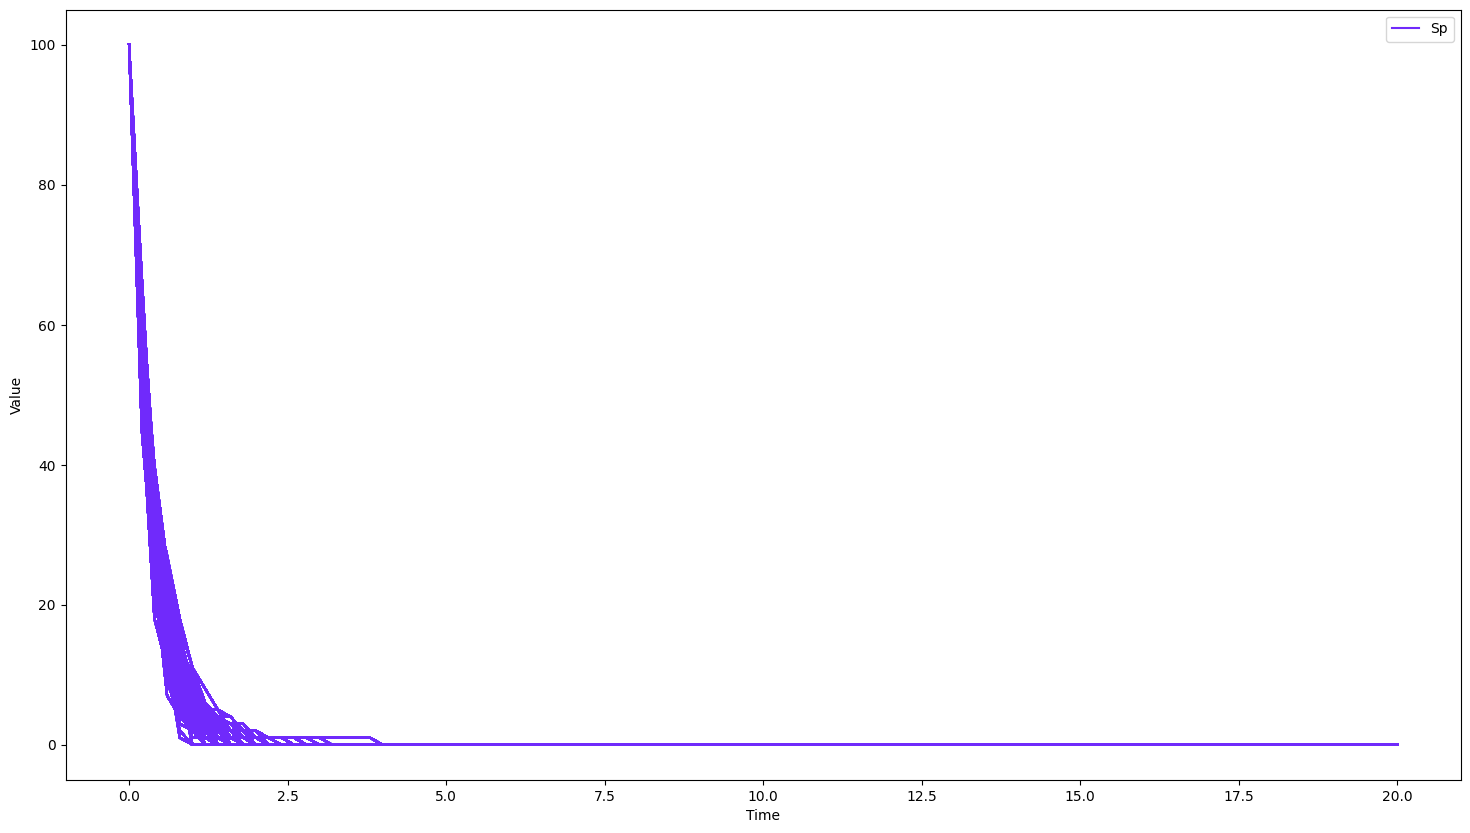

In [18]:
final.plot()

In [19]:
process.terminate()

In [20]:
dask.close()

2023-02-09 18:28:04,923 - distributed.nanny - INFO - Closing Nanny at 'tcp://127.0.0.1:44383'. Reason: nanny-close
2023-02-09 18:28:04,924 - distributed.nanny - INFO - Nanny asking worker to close. Reason: nanny-close
2023-02-09 18:28:04,925 - distributed.nanny - INFO - Closing Nanny at 'tcp://127.0.0.1:35687'. Reason: nanny-close
2023-02-09 18:28:04,925 - distributed.worker - INFO - Stopping worker at tcp://127.0.0.1:43991. Reason: nanny-close
2023-02-09 18:28:04,926 - distributed.nanny - INFO - Nanny asking worker to close. Reason: nanny-close
2023-02-09 18:28:04,927 - distributed.nanny - INFO - Closing Nanny at 'tcp://127.0.0.1:37415'. Reason: nanny-close
2023-02-09 18:28:04,926 - distributed.core - INFO - Connection to tcp://127.0.0.1:38435 has been closed.
2023-02-09 18:28:04,928 - distributed.worker - INFO - Stopping worker at tcp://127.0.0.1:36375. Reason: nanny-close
2023-02-09 18:28:04,929 - distributed.nanny - INFO - Nanny asking worker to close. Reason: nanny-close
2023-02-0